# Data Analysis Pipeline in Python

In this notebook we will demonstrate a typical pipeline for data analysis in Python. We will use the following Python packages that are very popular for data analysis and machine learning:

* Numpy - for the manipulation of numerical data.
* Pandas - for the manipulation of tables.
* Scikit-Learn - for machine learning.


In [1]:
import pandas as pd
import numpy as np
import sklearn

## 1. Develop an understanding of the purpose of the data mining exercise

We will use the **Iris data set**. This data set is like the "hello world" for machine learning. The data set consists of samples of measures from three kinds of flowers: *iris setosa*, *iris versicolor*, and *iris virginica*. The purpose of our exercise is to learn how to train and evaluate a simple machine learning classifier by using this data set. In particular, we will implement a statistical classifier that will automatically determine the flower given the sample.

![setosa](setosa.jpg) ![versicolor](versicolor.jpg) ![virginica](virginica.jpg)

## 2. Obtain the data set

Normally, obtaining the data set can be costly and time-consuming. In our case, it is given! The data set is available in most machine learning environments. It is of course available in Scikit-learn, but we will pretend it is not. Instead, we will download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris). Use the browser to download the following two files.

* [iris.data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
* [iris.names](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names)

Alternatively, execute the commands below (the commands below may only work in a Linux machine).

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-08-19 18:18:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: 'iris.data.3’

iris.data.3         100%[===================>]   4.44K  --.-KB/s    in 0.001s  

2020-08-19 18:18:50 (5.87 MB/s) - 'iris.data.3’ saved [4551/4551]



In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

--2020-08-19 18:18:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: 'iris.names.4’

iris.names.4        100%[===================>]   2.93K  --.-KB/s    in 0s      

2020-08-19 18:18:51 (46.6 MB/s) - 'iris.names.4’ saved [2998/2998]



## 3. Explore, clean, and preprocess

The file iris.names describes the data set:

In [4]:
cat iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

Let's load the data set into a Pandas data frame.

In [5]:
iris_data = pd.read_csv('iris.data', header=None)

In [6]:
iris_data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The file iris.names tells what column corresponds with what attribute. Let's add this information to the data frame.

In [7]:
iris_data.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Note that the class column has the name of the flower. There must be three names. Let's check that:

In [9]:
set(iris_data.Class)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

Now, sklearn only accepts integer values. We must convert the names into numbers. For example, `Iris-setosa` has the value 0, `Iris-versicolor` has the value 1, and `Iris-virginia` has the value 2. sklearn provides the function `preprocessing.LabelEncoder`. You can read the documentation here: https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

LabelEncoder()

In [11]:
le.transform(['Iris-setosa','Iris-setosa','Iris-virginica'])

array([0, 0, 2])

In [12]:
iris_data['Label'] = le.transform(iris_data.Class)

In [13]:
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Finally, since sklearn understands numpy's arrays and not Pandas data frames, we will separate the Pandas data frame into two numpy arrays:
* np_data contains the input data (sepal length, sepal width, etc)
* np_target contains the target labels (0, 1, 2)

In [14]:
np_data = iris_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
np_target = iris_data['Label'].values

For example, let's see the first 5 rows of np_data, and the first 5 elements of np_target:

In [15]:
np_data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
np_target[:5]

array([0, 0, 0, 0, 0])

It took quite long to go through this section! In general, a significant and time-consuming part in a data analysis project is to make sure that we have the right data in the right format. We could have used the iris data available in sklearn and we would have saved all this trouble, but in a real scenario the data would not be conveniently made available by any data analysis tools!

### Data exploration

The following code uses panda's ability to plot the data graphically (we will see more of this later in this unit).

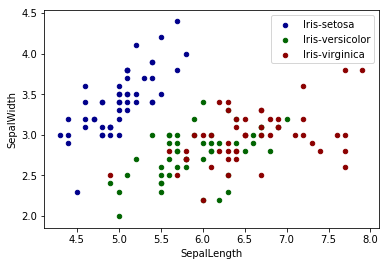

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

setosa_data = iris_data[iris_data.Class == 'Iris-setosa']
ax = setosa_data.plot.scatter(x='SepalLength', y='SepalWidth', color='DarkBlue', label='Iris-setosa')

versicolor_data = iris_data[iris_data.Class == 'Iris-versicolor']
ax = versicolor_data.plot.scatter(x='SepalLength', y='SepalWidth', color='DarkGreen', label='Iris-versicolor', ax=ax)

virginica_data = iris_data[iris_data.Class == 'Iris-virginica']
ax = virginica_data.plot.scatter(x='SepalLength', y='SepalWidth', color='DarkRed', label='Iris-virginica', ax=ax)

## 4. Reduce and partition the data

We are going to use a supervised approach so we will need to partition the data set into a training set and a test set. sklearn provides an easy way to do this. You can read more here: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_data, np_target, test_size=0.4, random_state=0)

In [19]:
X_train[:5,:]

array([[6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3]])

In [20]:
y_train[:5]

array([1, 0, 2, 1, 1])

In [21]:
X_train.shape

(90, 4)

In [22]:
X_test.shape

(60, 4)

## 5. Determine the data mining task and technique

We are going to use a statistical classifier. sklearn provides several classifiers. We will try the logistic regression classifier. This is one of the most common classifiers and good enough for this data set. You can read more about sklearn's classification models here: https://scikit-learn.org/stable/supervised_learning.html

In [23]:
from sklearn.linear_model import LogisticRegression

## 6. Iterative implementation and parameter tuning

In this section we would apply various methods to obtain the best of the statistical classifier. This is beyond the scope of this unit but if you want to know more, read sklearn's documentation: https://scikit-learn.org/stable/model_selection.html

Here we will just train the system using the default settings, and hope for the best.

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/diego/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/diego/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## 7. Assess the results; compare models
Let's evaluate the system by checking the results using the test set.

In [25]:
test_predictions = lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, test_predictions))

Accuracy: 0.9166666666666666


You can see that our simple classifier using the default settings obtained over 90% accuracy. After all this data set is very easy. Let's build a confusion matrix to determine the most common kinds of errors.

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_predictions)

array([[16,  0,  0],
       [ 0, 18,  5],
       [ 0,  0, 21]])

The confusin matrix is saying that there are 5 cases where  the label should have been 1 (iris versicolor) but was predicted as 2 (iris virginica). From the scatterplot above we knew that the system would predict class 0 (iris setosa) without problems.

## 8. Deploy the best model

Let's save the model so that it can be shipped to our customers. The customers should not need to re-train the system. sklearn recommends to use `joblib` to save the models into a file https://scikit-learn.org/stable/modules/model_persistence.html. However, in this example we will use `pickle`:

In [27]:
import pickle
with open('iris_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

Now we can send the file to the customer, who can just load it and apply it directly to their data:

In [28]:
with open('iris_model.pickle', 'rb') as f:
    customer_model = pickle.load(f)

In [29]:
customer_model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2])